# 1. Restaurant sales trend prediction based on factors like temperature and day of the week

In [1]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay


In [2]:
#importing dataset

In [3]:
df = pd.read_csv("restaurant_sales.csv")

In [4]:
df.head()

,Temperature_C,Day_of_the_week,Sales_Trend
0,35,6,high
1,32,5,high
2,30,4,moderate
3,28,3,moderate
4,25,2,low


In [5]:
df.tail()

,Temperature_C,Day_of_the_week,Sales_Trend
1042,31,0,moderate
1043,33,6,high
1044,35,5,high
1045,34,4,high
1046,32,3,moderate


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temperature_C    1047 non-null   int64 
 1   Day_of_the_week  1047 non-null   int64 
 2   Sales_Trend      1047 non-null   object
dtypes: int64(2), object(1)
memory usage: 24.7+ KB


In [7]:
df.describe()

,Temperature_C,Day_of_the_week
count,1047.000000,1047.000000
mean,35.389685,3.005731
std,5.360878,2.000470
min,25.000000,0.000000
25%,32.000000,1.000000
50%,36.000000,3.000000
75%,39.000000,5.000000
max,50.000000,6.000000


In [8]:
df['Day_of_the_week'].value_counts()

6    150
5    150
4    150
3    150
2    149
1    149
0    149
Name: Day_of_the_week, dtype: int64

In [9]:
# EDA

<Axes: >

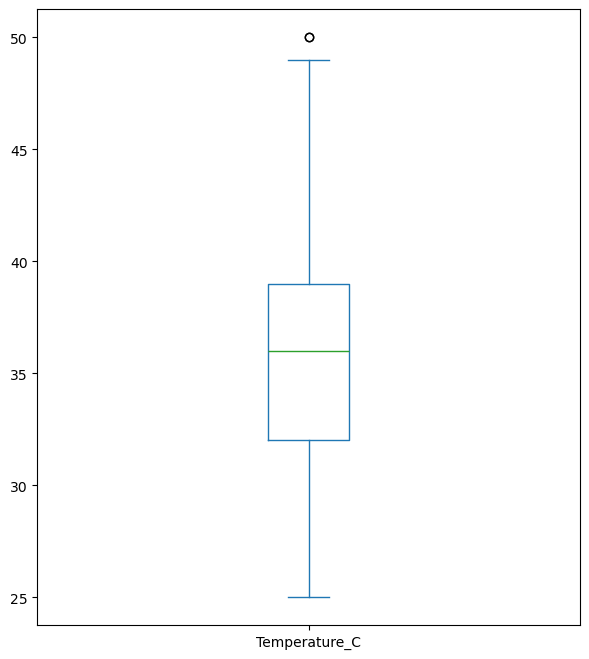

In [10]:
df.plot.box(column='Temperature_C',figsize=(7,8))

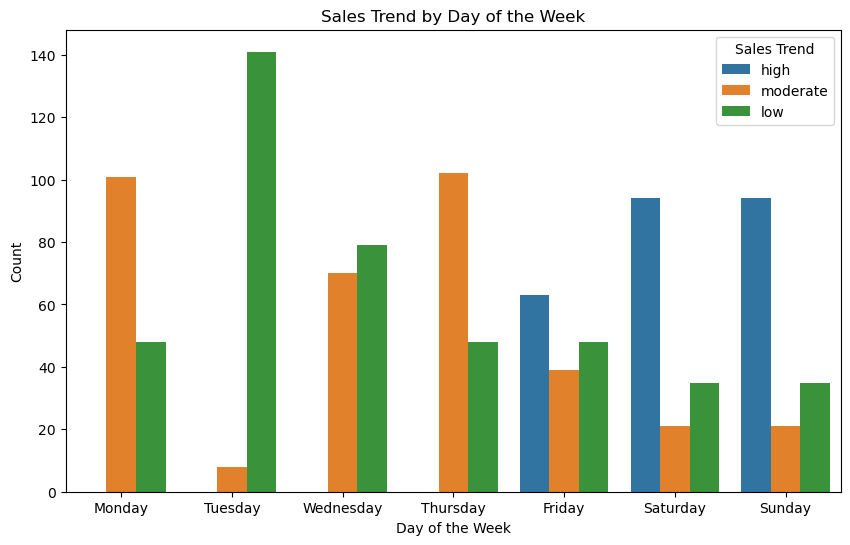

In [11]:
# Create a bar plot for Sales_Trend by Day_of_the_week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_the_week', hue='Sales_Trend', data=df)
plt.title('Sales Trend by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Sales Trend')
plt.show()

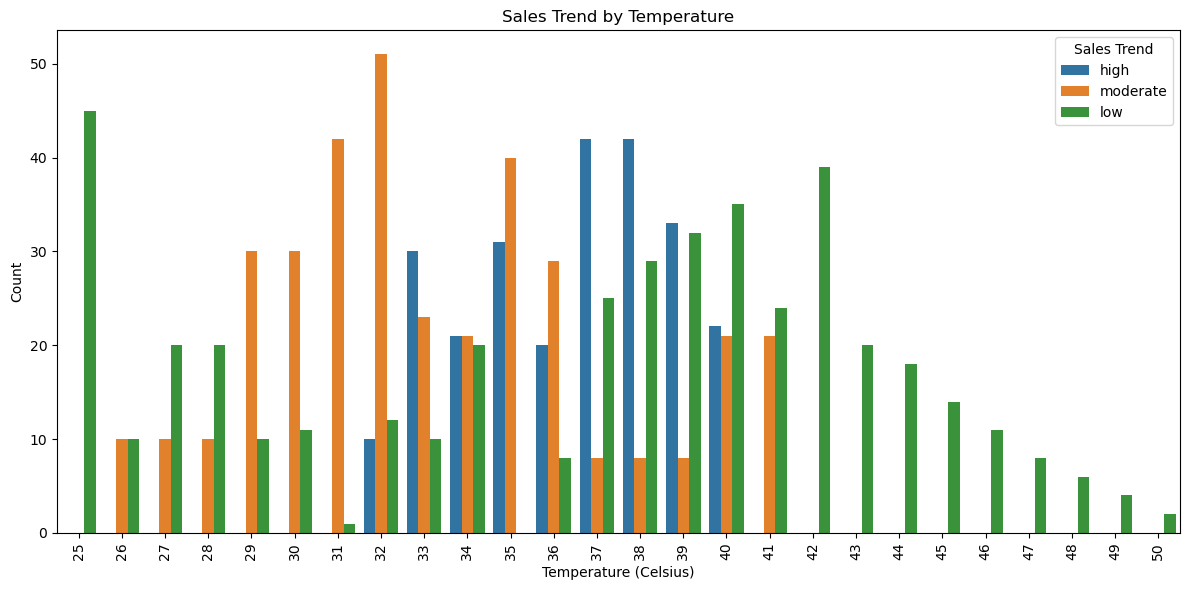

In [12]:
# Create a bar plot for Sales_Trend by Temperature_C
plt.figure(figsize=(12, 6))
sns.countplot(x='Temperature_C', hue='Sales_Trend', data=df)
plt.title('Sales Trend by Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sales Trend')
plt.tight_layout()
plt.show()

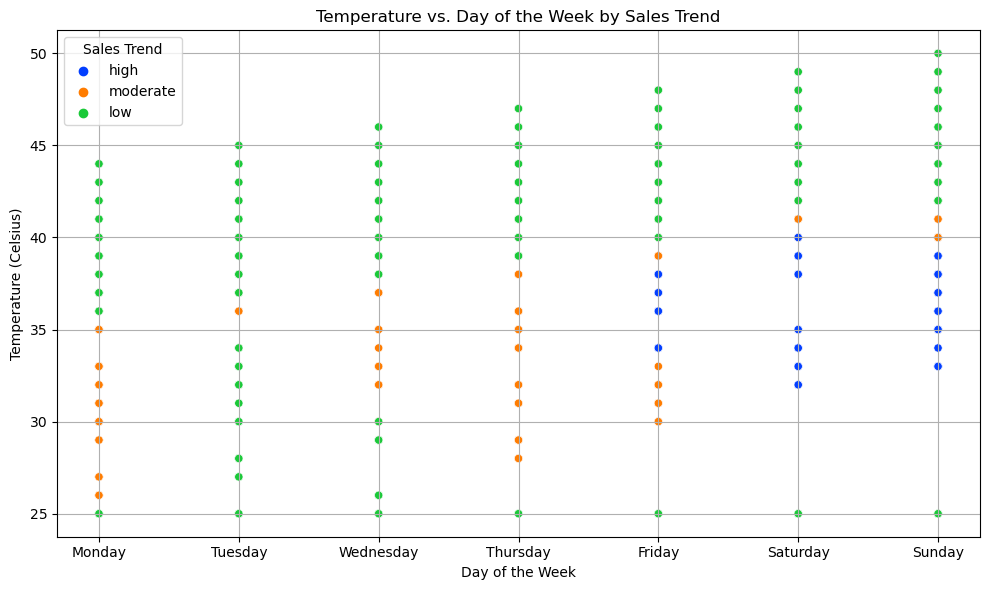

In [13]:
# Create a scatter plot for Temperature_C vs. Day_of_the_week colored by Sales_Trend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day_of_the_week', y='Temperature_C', hue='Sales_Trend', data=df, palette='bright')
plt.title('Temperature vs. Day of the Week by Sales Trend')
plt.xlabel('Day of the Week')
plt.ylabel('Temperature (Celsius)')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Sales Trend')
plt.grid(True)
plt.tight_layout()
plt.show()

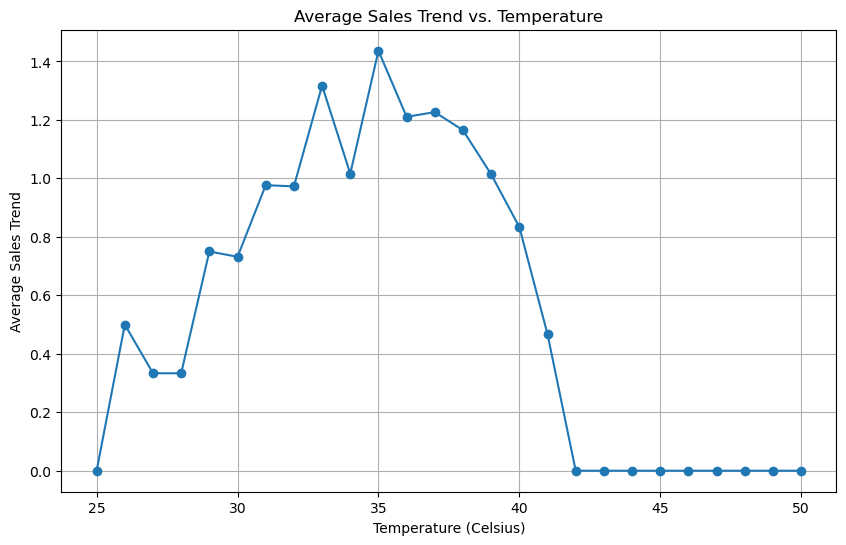

In [14]:
# Map sales trend categories to numerical values
sales_trend_mapping = {'low': 0, 'moderate': 1, 'high': 2}
df['Sales_Trend_Num'] = df['Sales_Trend'].map(sales_trend_mapping)

# Group the data by Temperature_C and calculate the mean sales trend for each temperature
mean_sales_by_temperature = df.groupby('Temperature_C')['Sales_Trend_Num'].mean().reset_index()

# Create a line plot for Sales_Trend_Num vs. Temperature_C
plt.figure(figsize=(10, 6))
plt.plot(mean_sales_by_temperature['Temperature_C'], mean_sales_by_temperature['Sales_Trend_Num'], marker='o', linestyle='-')
plt.title('Average Sales Trend vs. Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Average Sales Trend')
plt.grid(True)
plt.show()

In [15]:
#split dataframe into training and testing set

In [16]:
X = df[['Temperature_C', 'Day_of_the_week']]
y = df['Sales_Trend']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(837, 2)

In [19]:
 X_test.shape

(210, 2)

In [20]:
y_train.shape

(837,)

In [21]:
y_test.shape

(210,)

# 1. Logistic Regression

In [22]:
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)


In [23]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [24]:
y_pred = logistic_model.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.6142857142857143

# 2. Decision Tree

In [26]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [27]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
y_pred_tree = decision_tree_model.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_tree)

0.9761904761904762

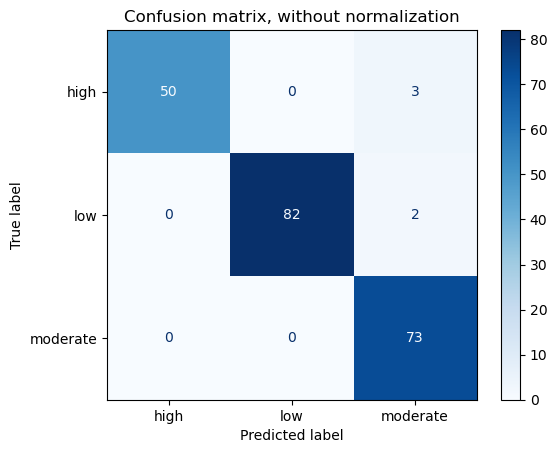

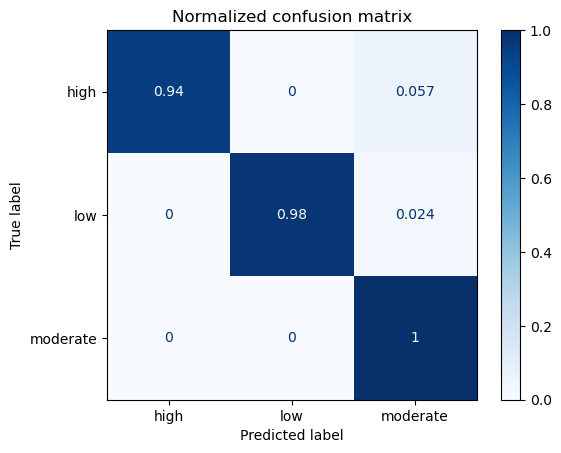

In [30]:

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        decision_tree_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

In [31]:
precision_score(y_test, y_pred_tree, average='weighted')

0.9777167277167277

In [32]:
recall_score(y_test, y_pred_tree, average='weighted')

0.9761904761904762

In [33]:
f1_score(y_test, y_pred_tree, average='weighted')

0.9763192568752104

In [34]:
# dumping the model 

In [37]:
import pickle

In [39]:
# Save the model to a file
with open('./../savedModels/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)